## EDA(Exploratory Data Analysis)탐색적 데이터 분석

모델링에 앞서 데이터를 살피는 과정 
1. 분석의 목적과 변수가 무엇이 있는지 확인. 개별변수의 이름이나 성명을 가지고 있는지 확인
2. 데이터를 전체적으로 살펴보기 (이상치,결측치 확인)
3. 데이터의 개별 속성값 관찰
4. 속성 간의 상관관계에 초첨을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견(상관관계, 시각화) 

> 시각화 기본: 구성, 분포, 관계, 비교

In [2]:

import numpy as np 
import pandas as pd 

#시각화 라이브러리
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
train = pd.read_csv('train.csv')#파일입력
test= pd.read_csv('test.csv')
sample_submission= pd.read_csv('sample_submission.csv')
#pd.read_csv()로 csv파일 불러오기


In [4]:
train.head(6) 

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
5,5,43,Private,236985,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K


In [5]:
print(train.columns)

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


데이터의 각 feature 설명 (data description에서 제공)

* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
id                26049 non-null int64
age               26049 non-null int64
workclass         26049 non-null object
fnlwgt            26049 non-null int64
education         26049 non-null object
education_num     26049 non-null int64
marital_status    26049 non-null object
occupation        26049 non-null object
relationship      26049 non-null object
race              26049 non-null object
sex               26049 non-null object
capital_gain      26049 non-null int64
capital_loss      26049 non-null int64
hours_per_week    26049 non-null int64
native_country    26049 non-null object
income            26049 non-null object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


info():
* dataframe의 정보확인
* null값 확인 
* 'object'는 숫자형이 아닌 자료형 데이터이므로 전처리과정 필요

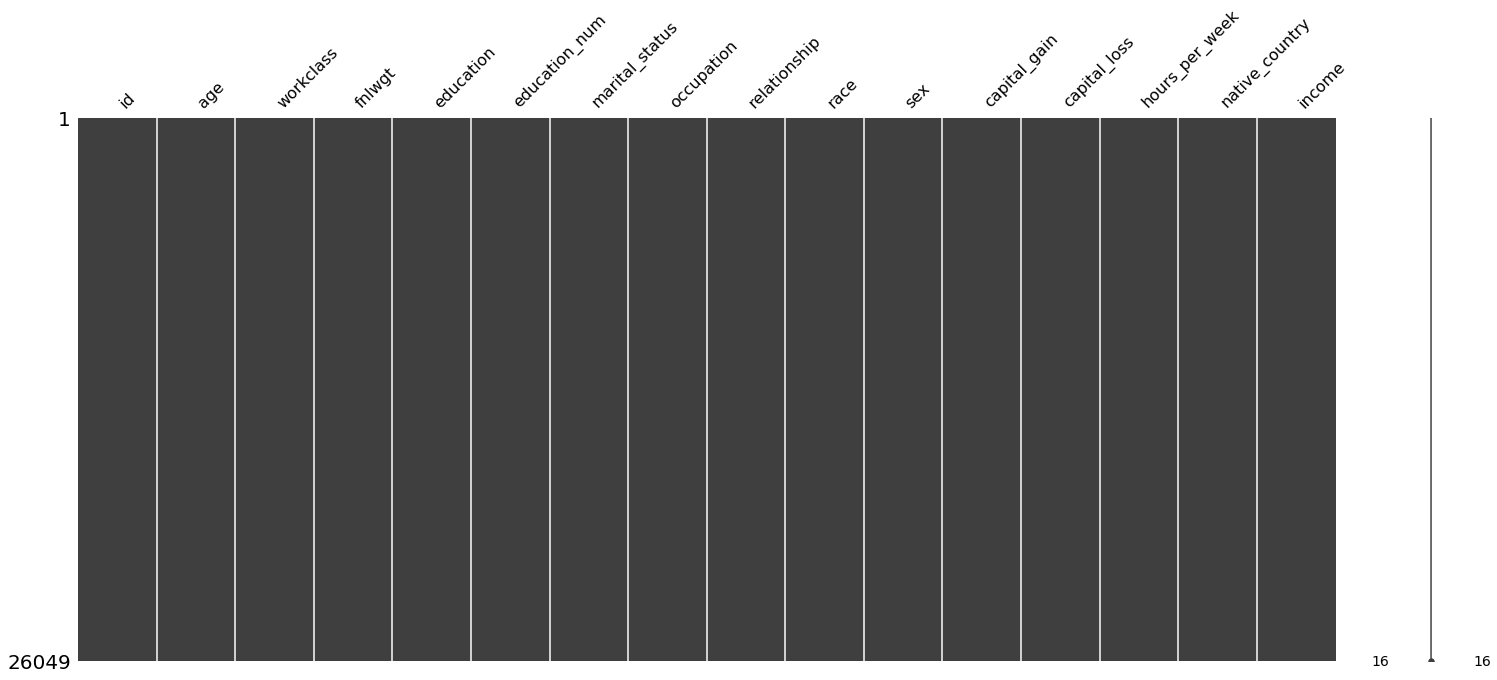

In [7]:
import missingno as msno #missing value시각화
msno.matrix(train)

In [8]:
train['workclass'].value_counts() 
#value_counts()각각의 피처값이 몇개씩 있는지 확인 

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

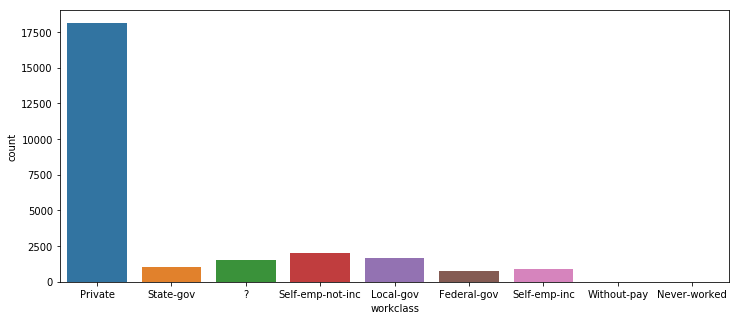

In [9]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=train,x='workclass',ax=ax)#피처값 시각화
plt.show()

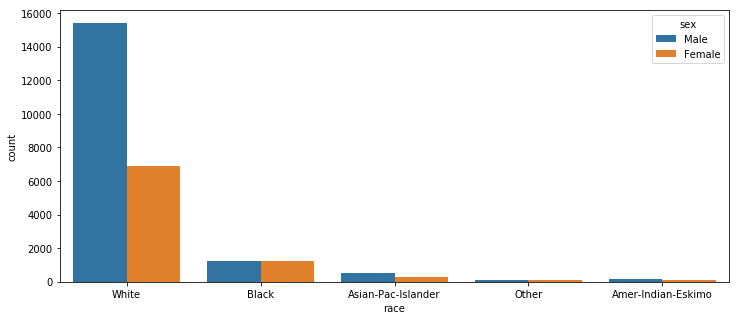

In [10]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=train,x='race',ax=ax,hue='sex')
#피처값 시각화,#hue='',''값에 따라 다른 색상막대로 나누어 확인 가능 
plt.show()

In [11]:
import seaborn as sns
print(sns.__version__) #sns페키지의 virsion 확인 

0.9.0


In [12]:
#!pip install seaborn==0.11 #sns페키지 11로 업데이트가능 

In [13]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


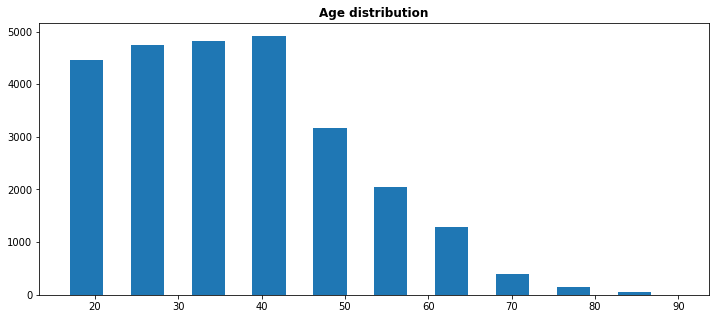

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
ax.hist(train['age'],width=4)#히스토그램 #width라인 간격 조정 가능 
ax.set_title('Age distribution',fontweight='bold')
plt.show()

In [15]:
# sns.kdeplot(data=train, x='age')
#이 밀도함수그래프식은 왜 에러가 나는지 ㅜ

In [16]:
#income의 문자열데이터를 0,1로 바꾸기
train['income']=(train['income']=='>50K').astype(int)
train['income']


0        1
1        0
2        0
3        0
4        0
5        0
6        1
7        0
8        1
9        1
10       0
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       1
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       0
        ..
26019    0
26020    0
26021    0
26022    1
26023    0
26024    0
26025    0
26026    1
26027    1
26028    1
26029    0
26030    0
26031    0
26032    0
26033    1
26034    0
26035    0
26036    0
26037    0
26038    0
26039    0
26040    0
26041    0
26042    0
26043    1
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int32

'>50K'넘으면 1 아니면 0
pivot table 생성 가능 

In [17]:
train.groupby(['race','sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female  12309.681818  37.454545  117238.954545   
                   Male    12441.331325  36.915663  125551.475904   
Asian-Pac-Islander Female  14562.177778  35.181481  146863.433333   
                   Male    12538.909434  38.884906  166262.398113   
Black              Female  12575.603774  37.939295  216797.705496   
                   Male    13192.518695  37.884646  243795.577566   
Other              Female  13165.047059  31.435294  173440.082353   
                   Male    11760.907563  34.789916  220238.193277   
White              Female  13036.291238  36.844026  184007.053584   
                   Male    13049.281506  39.589163  189231.912524   

                           education_num  capital_gain  capital_loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.761364    646.636364     19.556818   
                   Male         9.090361    649.596386     53.662651   
Asian-Pac-Islander Female      10.325926    584.325926     61.122222   
                   Male        11.233962   2026.226415    135.403774   
Black              Female       9.525021    487.988515     40.462674   
                   Male         9.482896    579.319809     76.113763   
Other              Female       8.941176    236.129412     39.176471   
                   Male         8.907563   1799.764706     87.529412   
White              Female      10.127589    580.929761     63.601738   
                   Male        10.149254   1386.644906    103.084945   

                           hours_per_week    income  
race               sex                               
Amer-Indian-Eskimo Female       36.204545  0.102273  
                   Male         41.837349  0.120482  
Asian-Pac-Islander Female       37.407407  0.125926  
                   Male         42.037736  0.341509  
Black              Female       36.796555  0.051682  
                   Male         39.976134  0.190135  
Other              Female       36.670588  0.047059  
                   Male         41.403361  0.117647  
White              Female       36.209269  0.122085  
                   Male         42.687735  0.317846

위 그래프에서 백인 여성의 12%만이 소득이 5만불이 넘는다는 것을 확인 할 수 있다.


In [18]:
train.groupby(['race','sex'])[['income']].mean().style.background_gradient(cmap='Purples')

또는 배경색을 값에 따라 다르게 지정 할 수 도 있음

남성이 전체적으로 여성보다 수익비율이 높은 것을 알 수 있다. 

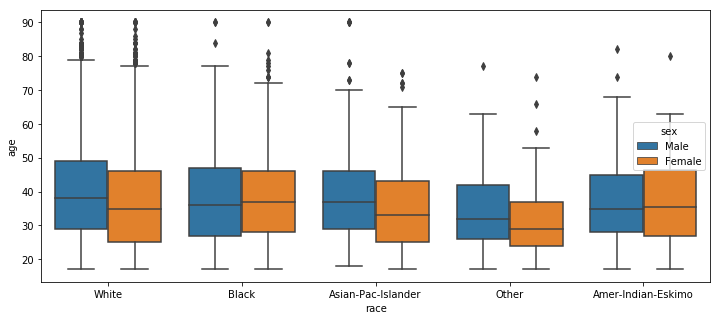

In [19]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.boxplot(data=train, x='race',y='age',hue='sex')
plt.show()

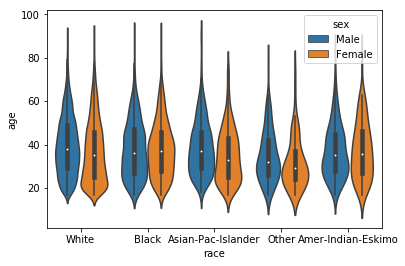

In [20]:
sns.violinplot(data=train, x='race',y='age',hue='sex')
plt.show()

In [21]:
train.corr().style.background_gradient() #상관계수확인


,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1,0.00786553,-0.00119113,0.00230886,0.00722767,-0.0025529,0.00574855,0.00435041
age,0.00786553,1,-0.0766177,0.0401072,0.0777683,0.0578755,0.0660383,0.229292
fnlwgt,-0.00119113,-0.0766177,1,-0.0463766,0.00095304,-0.00868895,-0.0200643,-0.00749959
education_num,0.00230886,0.0401072,-0.0463766,1,0.119382,0.0748135,0.146063,0.334582
capital_gain,0.00722767,0.0777683,0.00095304,0.119382,1,-0.0320297,0.080543,0.225296
capital_loss,-0.0025529,0.0578755,-0.00868895,0.0748135,-0.0320297,1,0.0549567,0.152537
hours_per_week,0.00574855,0.0660383,-0.0200643,0.146063,0.080543,0.0549567,1,0.233726
income,0.00435041,0.229292,-0.00749959,0.334582,0.225296,0.152537,0.233726,1


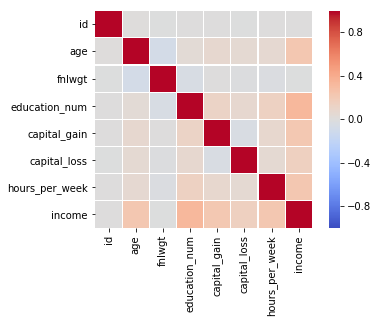

In [22]:
corr=train.corr()
sns.heatmap(corr,square=True,linecolor="white",linewidth=0.1,
            cmap='coolwarm',vmax=1.0,vmin=-1.0)

## 모델에 적합한 INPUT 형태 만들기 

features(X)와 target(y)으로 나누어 모델에 넣어주기

예측데이터인 income feature는 따로 빼두어야 함 

In [23]:
target = train['income']

In [24]:
target.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: income, dtype: int32

In [25]:
train.drop(['income'],axis=1,inplace=True)

In [26]:
train.head() #'income'값 빠진것 확인

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?


범주형(catecorical) feature의 경우, encoding이 필요하다.
## ENCODING 방법
* Label Encoding
* One hot Encoding
* Mean Encoding

In [27]:
from category_encoders.ordinal import OrdinalEncoder

In [28]:
#pip install category_encoders

In [29]:
LE_encoder =OrdinalEncoder(list(train.columns))
train_le = LE_encoder.fit_transform(train)
test_le = LE_encoder.transform(test)
#문자형을 숫자형으로 변환

In [30]:
train_le.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,1,168538,1,9,1,1,1,1,1,0,0,60,1
1,1,17,1,101626,2,5,2,2,2,1,1,0,0,20,1
2,2,18,1,353358,3,10,2,3,2,1,1,0,0,16,1
3,3,21,1,151158,3,10,2,4,2,1,2,0,0,25,1
4,4,24,1,122234,3,10,2,5,3,2,2,0,0,20,2


In [31]:
LE_encoder

OrdinalEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'],
        drop_invariant=False, handle_missing='value',
        handle_unknown='value',
        mapping=[{'col': 'workclass', 'mapping': Private             1
State-gov           2
?                   3
Self-emp-not-inc    4
Local-gov           5
Federal-gov         6
Self-emp-inc        7
Without-pay         8
Never-worked        9
NaN                -2
dtype: int64, 'data_type': dtype('O')},...                         41
NaN                           -2
dtype: int64, 'data_type': dtype('O')}],
        return_df=True,
        verbose=['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'])

## 모델 훈련 및 예측 


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_le, target)
#의사결정트리

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 결과제출

In [35]:
dt_clf.predict(test_le)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
sample_submission['prediction'] = dt_clf.predict(test_le).astype(int)
sample_submission.to_csv('submission.csv', index=False)